In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify
from scipy.stats import norm
import plotly.express as px
import plotly.figure_factory as ff

<img src="iris-image.png"/>

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [4]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

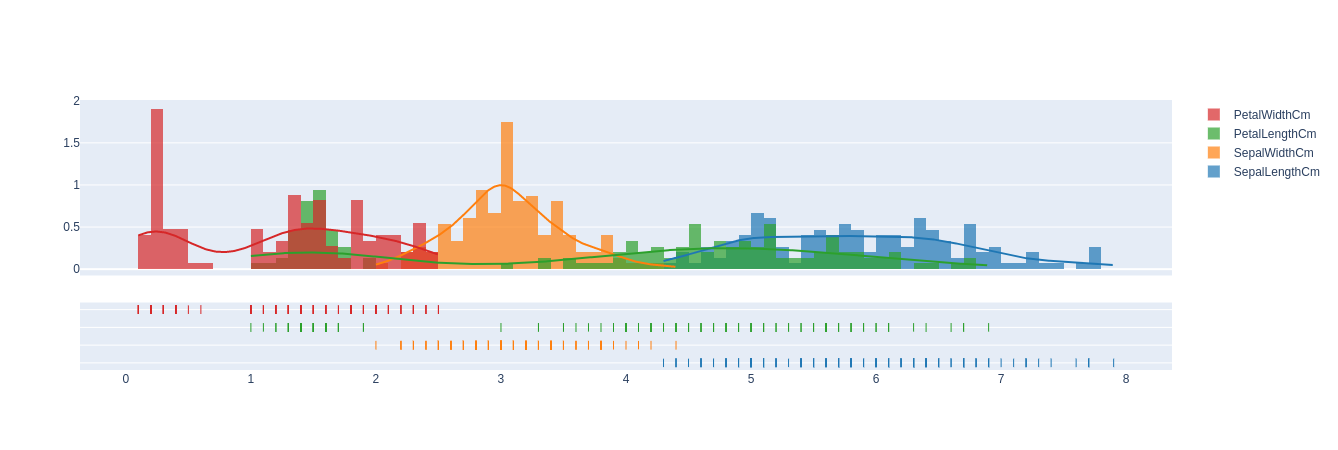

In [5]:
 
group_labels = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

att1 = df['SepalLengthCm']
att2 = df['SepalWidthCm']
att3 = df['PetalLengthCm']
att4 = df['PetalWidthCm']

fig = ff.create_distplot([att1, att2, att3, att4], group_labels, bin_size=0.1)
fig.show()

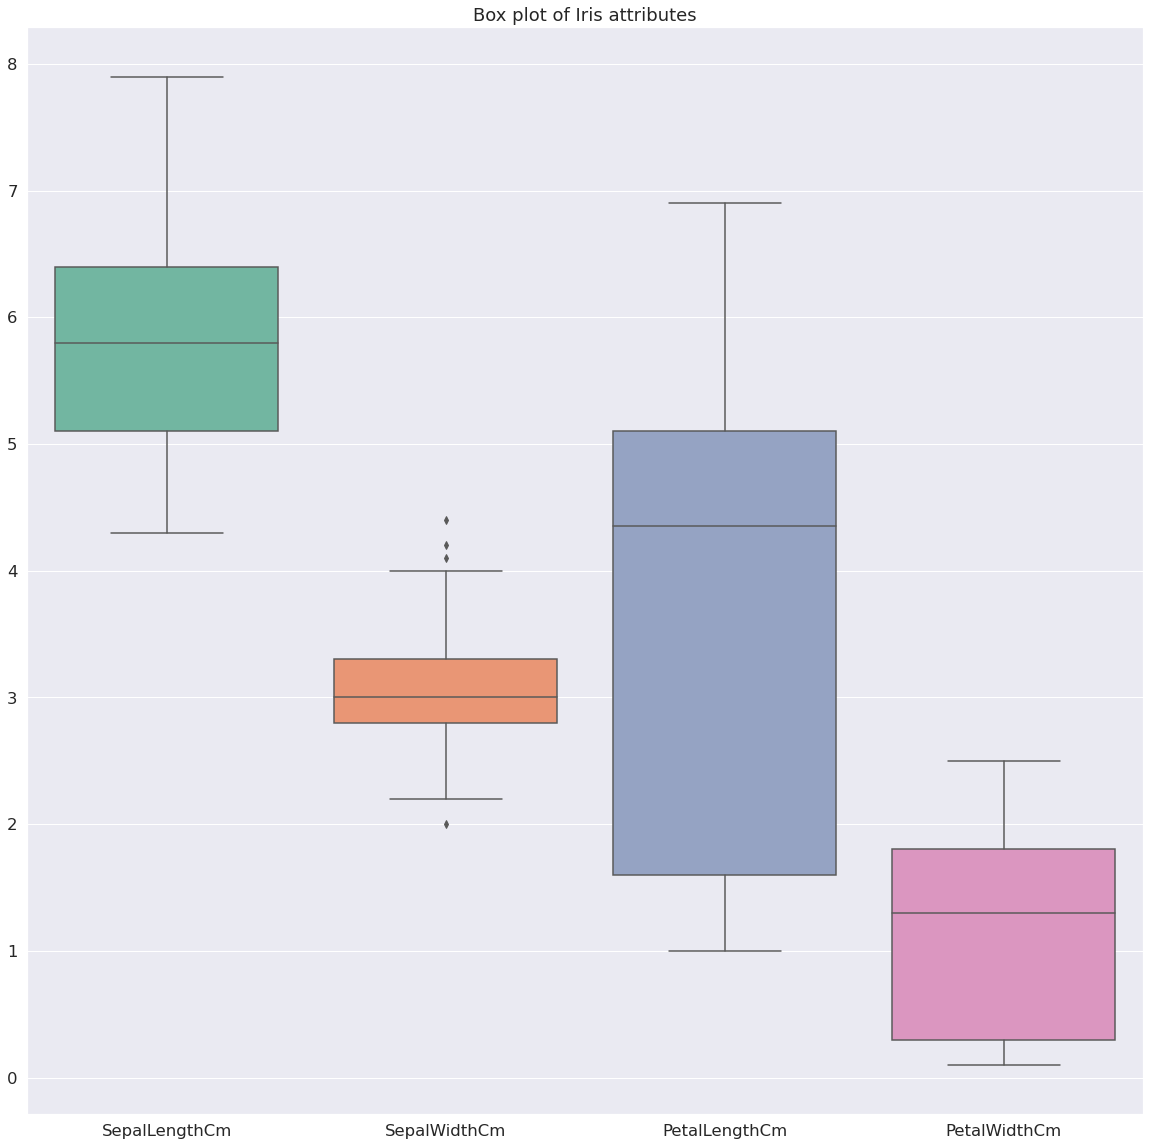

In [6]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 20)})

ax = sns.boxplot(data=df.drop("Id",axis=1), orient="v", palette="Set2")

ax = ax.set_title('Box plot of Iris attributes')


# fig = px.box(df.drop("Id",axis=1), y="PetalWidthCm")
# fig.show()

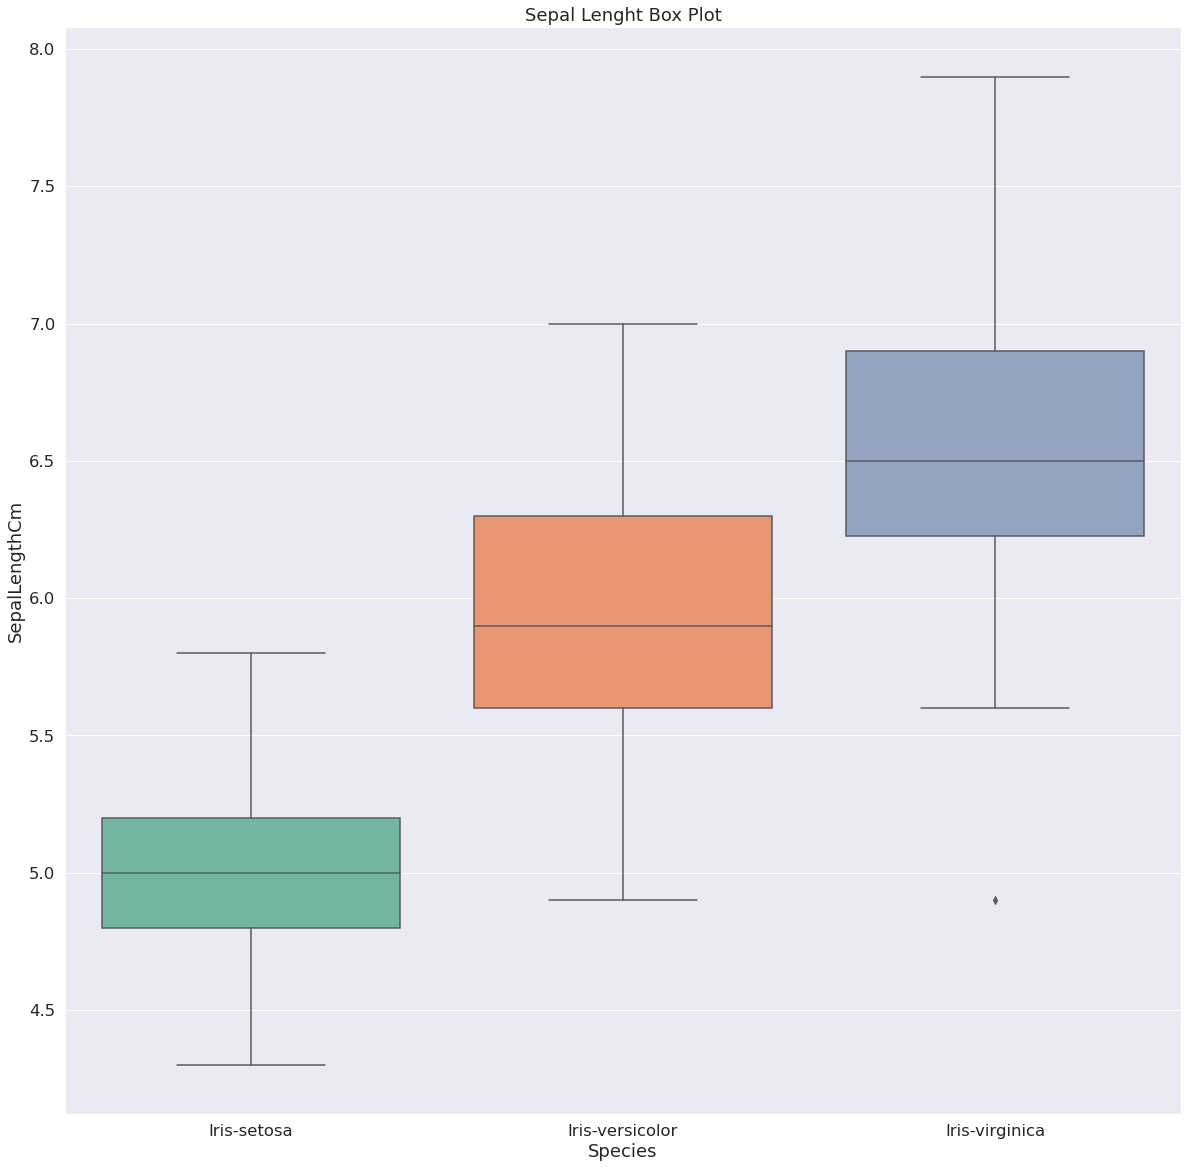

In [7]:
ax = sns.boxplot(x="Species", y="SepalLengthCm", palette="Set2", data=df)

ax = ax.set_title('Sepal Lenght Box Plot')

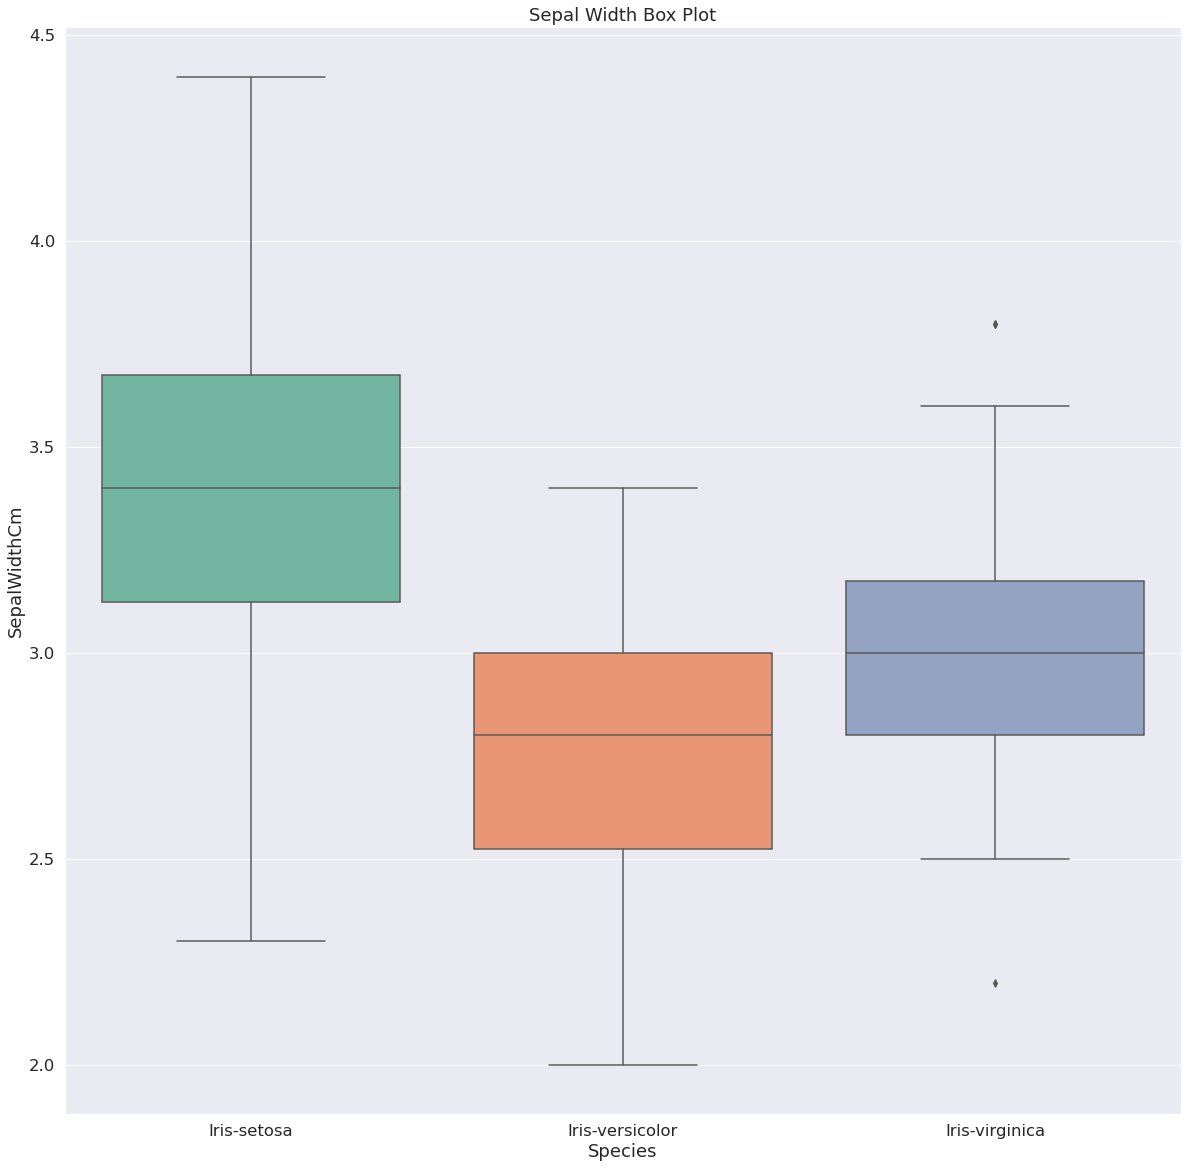

In [8]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 20)})

ax = sns.boxplot(x="Species", y="SepalWidthCm", palette="Set2", data=df)

ax = ax.set_title('Sepal Width Box Plot')

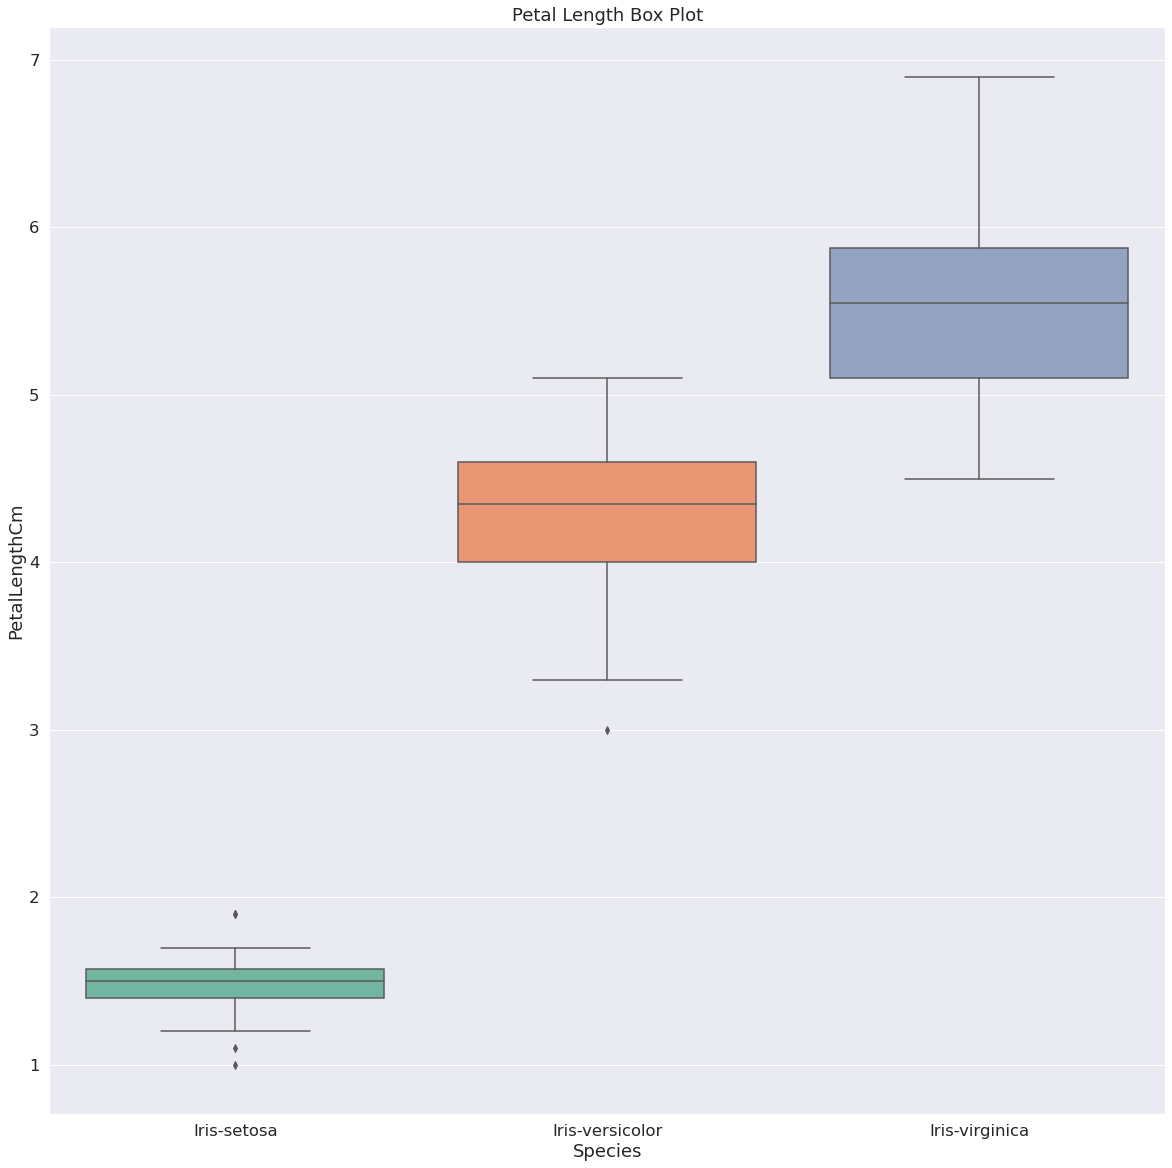

In [9]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 20)})

ax = sns.boxplot(x="Species", y="PetalLengthCm",palette="Set2", data=df)

ax = ax.set_title('Petal Length Box Plot')

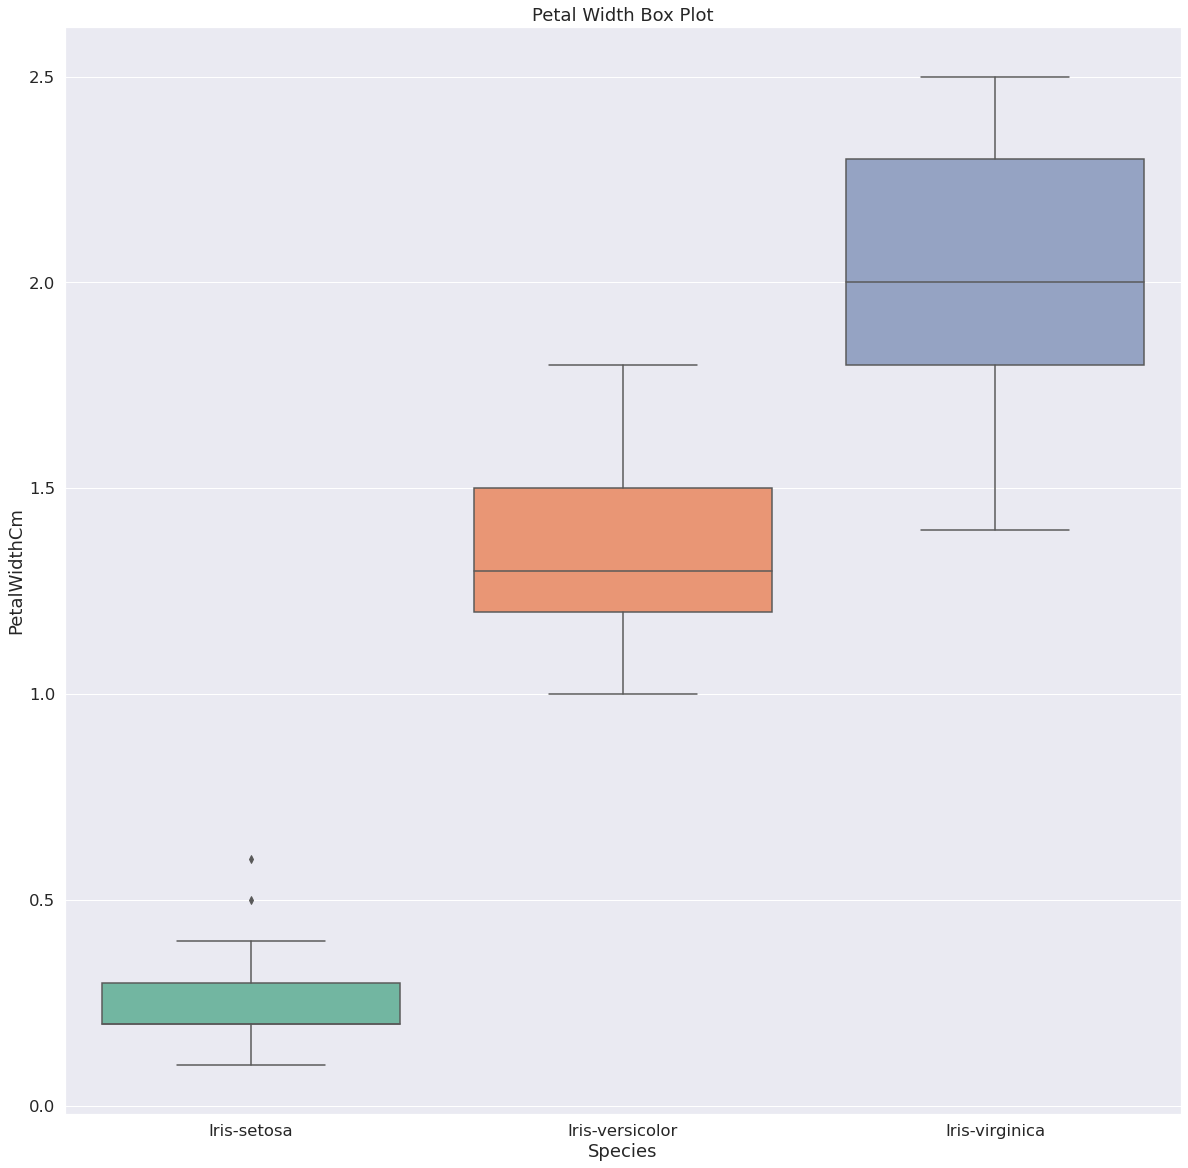

In [10]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 20)})

ax = sns.boxplot(x="Species", y="PetalWidthCm",palette="Set2", data=df)

ax = ax.set_title('Petal Width Box Plot')

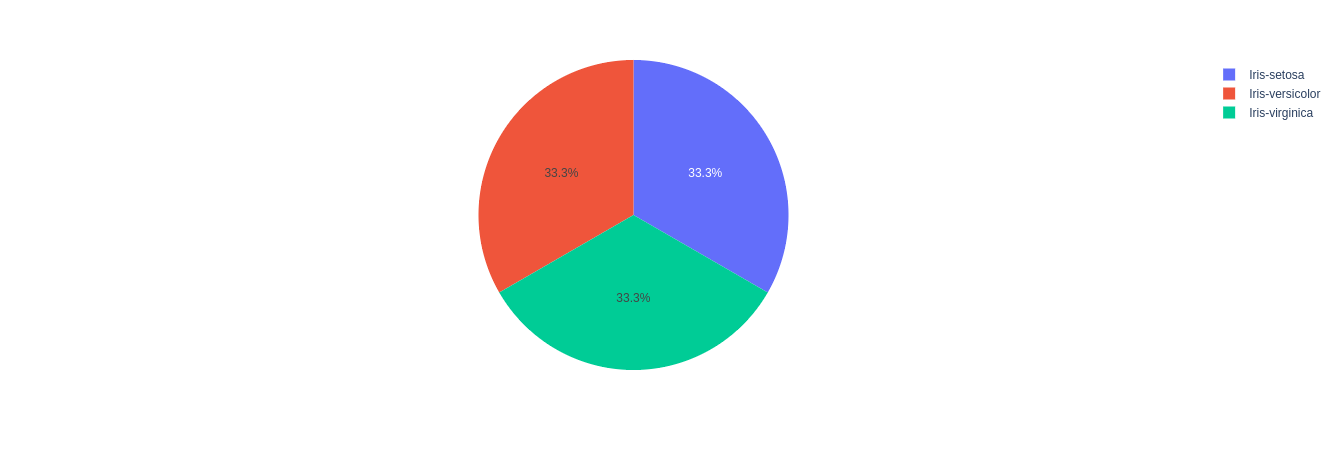

In [11]:
# df1 = pd.DataFrame({'Species': df['Species'].value_counts()},
#                   index=df['Species'].unique())
# df1.plot(kind='pie', y='Species', figsize=(10,10))

# fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

# spiece = df['Species'].unique()

# data = df['Species'].value_counts()
# samples = [x.split()[-1] for x in spiece]


# def func(pct, allvals):
#     absolute = int(pct/100.*np.sum(allvals))
#     return "{:.1f}%\n({:d} samples)".format(pct, absolute)


# wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
#                                   textprops=dict(color="black"))

# ax.legend(wedges, samples,
#           title="Spieces",
#           loc="center left",
#           bbox_to_anchor=(1, 0, 0.5, 1))

# plt.setp(autotexts, size=14, weight="bold")

# ax.set_title("Pie chart count sample's number of each spiece")

# plt.show()

df1 = pd.DataFrame({'Counts': df['Species'].value_counts(),'Species': df['Species'].unique()})

fig = px.pie(df1, values='Counts' , names='Species')
fig.show()

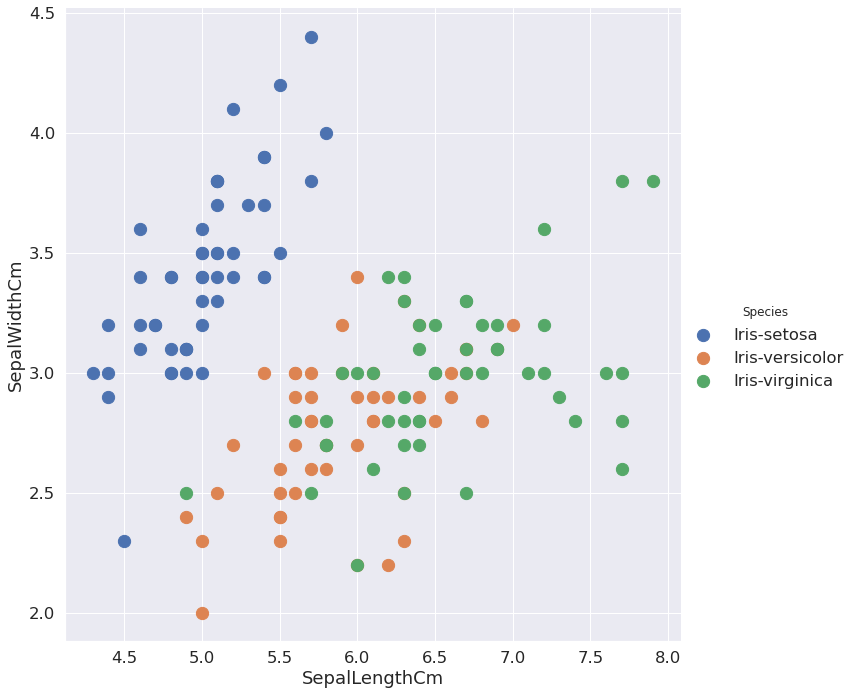

In [12]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="Species", height=10).map(plt.scatter, "SepalLengthCm", "SepalWidthCm", s=150).add_legend()

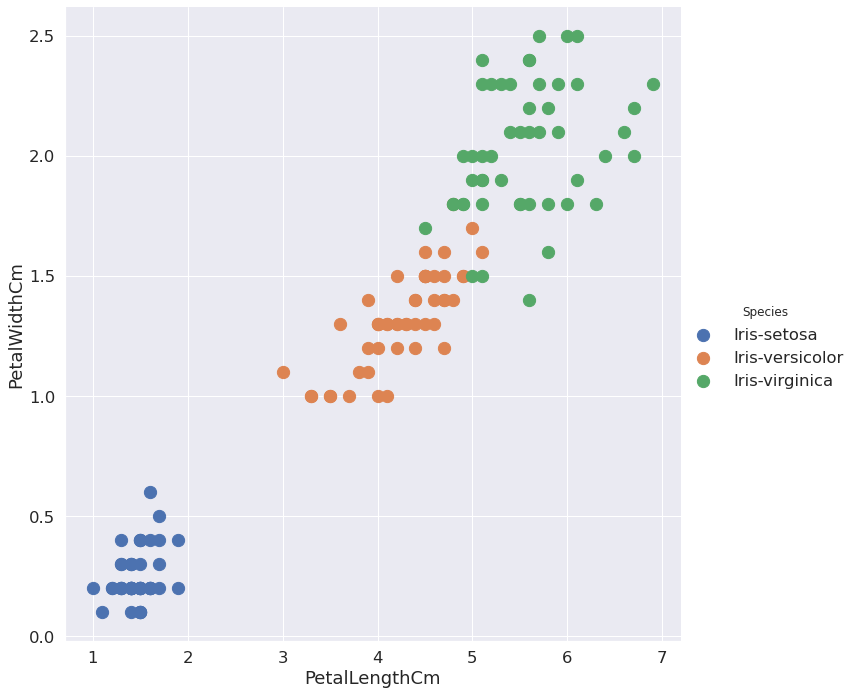

In [13]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="Species", height=10).map(plt.scatter, "PetalLengthCm", "PetalWidthCm", s=150).add_legend()

<Figure size 1440x1440 with 0 Axes>

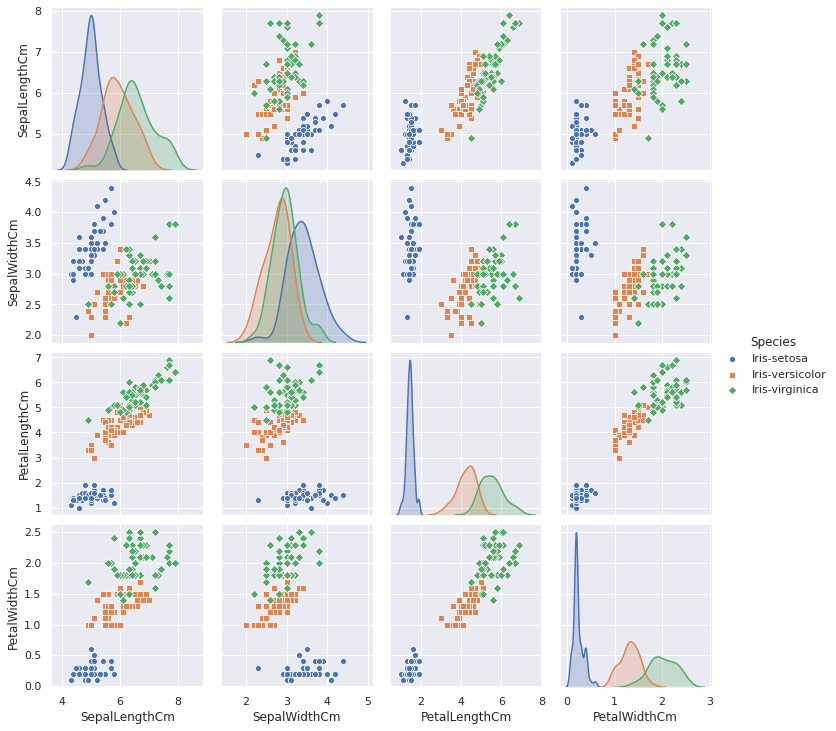

In [14]:
sns.set(font_scale=1.0) 
plt.figure(figsize=(20, 20))

axs = sns.pairplot(df.drop('Id',axis=1), hue="Species", markers=["o", "s", "D"])

In [32]:
df["Species_Id"] = df["Species"].astype('category').cat.codes

print(df[['Species_Id','Species']]['Species'].unique())
print(df[['Species_Id','Species']]['Species_Id'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


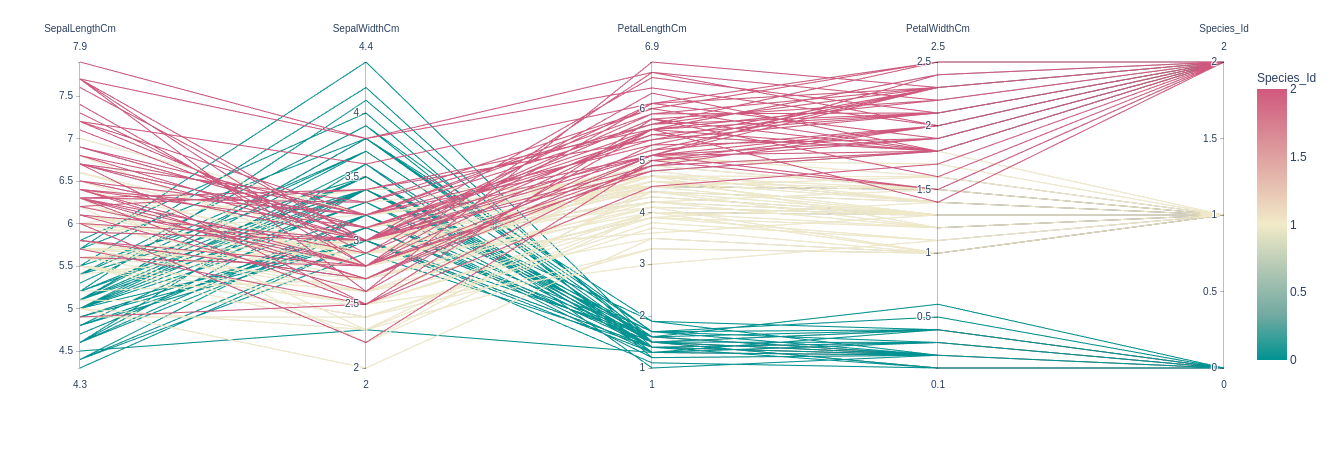

In [33]:

fig = px.parallel_coordinates(
    df.drop("Id",axis=1),
    color = "Species_Id",
#     labels = {
#             "species_id": "Species",
#             "SepalWidthCm": "Sepal Width",
#             "SepalLengthCm": "Sepal Length",
#             "PetalLengthCm": "Petal Width", 
#             "PetalWidthCm": "Petal Length"
#            },
    dimensions=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm', 'Species_Id'],
    color_continuous_scale = px.colors.diverging.Tealrose,
    color_continuous_midpoint = 1
)
fig.show()

print()